![](https://images.pexels.com/photos/3785729/pexels-photo-3785729.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)

# Blob Detection

Kevin J. Walchko, Phd

15 Jan 2017

---


## References

- [Blob detection](https://www.learnopencv.com/blob-detection-using-opencv-python-c/)

OpenCV has a simple blob detector built into it. However, the performance, at least on the python side, seems to be a little finicky, so you might have to play with the parameters to get them to work right.

![](blobs/blob_detection.jpg)

The steps are:

1. Convert the source image to binary images by applying thresholding with several thresholds from minThreshold (inclusive) to maxThreshold (exclusive) with distance thresholdStep between neighboring thresholds.
1. Extract connected components from every binary image by findContours and calculate their centers.
1. Group centers from several binary images by their coordinates. Close centers from one group that corresponds to one blob, which is controlled by the minDistBetweenBlobs parameter.
1. From the groups, estimate final centers of blobs and their radii and return as locations and sizes of keypoints.

The detector performs several filtrations of the discovered blobs. The default appears to be searching for darker (i.e., black) blobs which is the inverse of what you often think of.

<img src="blobs/BlobTest.jpg" width="400px">

Available filtrations:

- **Color** (**This seems to be broken**). This filter compares the intensity of a binary image at the center of a blob to blobColor. If they differ, the blob is filtered out. 
    - blobColor = 0 to extract dark blobs
    - blobColor = 255 to extract light blobs.
- **Area**. Extracted blobs have an area between minArea (inclusive) and maxArea (exclusive).
- **Circularity**. Extracted blobs have circularity ($\frac{4∗\pi∗Area}{perimeter^2}$) between minCircularity (inclusive) and maxCircularity (exclusive).
    - A circle has a circularity of 1
    - A regular hexagon has higher circularity than say a square
- **Ratio of the minimum inertia to maximum inertia**. All you have to know is that this measures how elongated a shape is. E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0. Extracted blobs have this ratio between minInertiaRatio (inclusive) and maxInertiaRatio (exclusive). [Moments of inertia](https://en.wikipedia.org/wiki/List_of_moments_of_inertia).
<img src="blobs/inertia.jpg" width="400px">
- **Convexity**. Extracted blobs have convexity ($\frac{area}{area_{blob-convex-hull}}$) between minConvexity (inclusive) and maxConvexity (exclusive).
<img src="blobs/concave-convex.jpg" width="400px">

Default values of parameters are tuned to extract dark circular blobs, so you will usually need to invert a white mask image.

```python
params = cv2.SimpleBlobDetector_Params()

# color - doesn't seem to work
# params.blobColor = 255

# Change thresholds - levels
params.minThreshold = 0  # inclusive
params.maxThreshold = 1  # exclusive
params.thresholdStep = 1

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity - doesn't seem very precise
params.filterByCircularity = True
params.maxCircularity = 1.2
params.minCircularity = .7

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)
im_with_keypoints = cv2.drawKeypoints(
    frame,
    keypoints,
    None,  # output image
    (0,0,255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(im_with_keypoints)
```

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [3]:
import pylab                                 
pylab.rcParams['figure.figsize'] = (10.0, 18.0)

In [4]:
def printParams(params):
    # this is just a helper function to print a lot of stuff nicely
    # it doesn't do anything really
    print('[Parameters]')
    print('  Repeatability: {}'.format(params.minRepeatability))
    print('  Color[{}]'.format(params.filterByColor))
    print('  Threshold[{}]: {}:{}'.format(
        params.thresholdStep, 
        params.minThreshold, 
        params.maxThreshold))
    print('  Inertia[{}]: {}/{}'.format(
        params.filterByInertia, 
        params.minInertiaRatio, 
        params.minInertiaRatio))
    print('  Area[{}]: {}/{}'.format(
        params.filterByArea,
        params.minArea,params.maxArea))
    print('  Convexity[{}]: {}/{}'.format(
        params.filterByConvexity,
        params.minConvexity,
        params.maxConvexity))
    print('  Circularity[{}]: {}/{}'.format(
        params.filterByCircularity,
        params.minCircularity,
        params.maxCircularity))

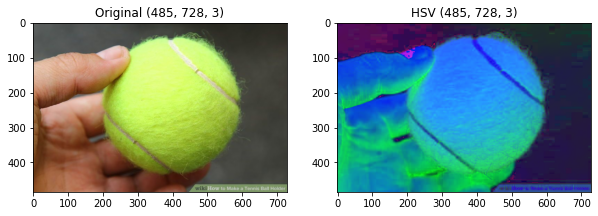

In [6]:
# read in image and convert to HSV
# im = cv2.imread('tennis/tennis_test.jpg')
im = cv2.imread('tennis/test6.jpg')
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original {}'.format(im.shape))

plt.subplot(1,2,2)
plt.imshow(hsv)
plt.title('HSV {}'.format(hsv.shape));

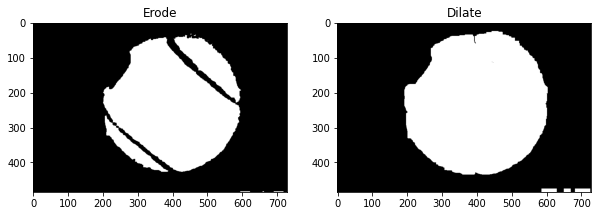

In [10]:
# find colors in range
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)
detect = cv2.inRange(hsv, greenLower, greenUpper)

# get rid of stray and noisy pixels
erode = cv2.erode(detect, None, iterations=2)

plt.subplot(1,2,1)
plt.imshow(erode, cmap='gray')
plt.title('Erode');

# close up small holes
dilate = cv2.dilate(erode, None, iterations=8)

plt.subplot(1,2,2)
plt.imshow(dilate, cmap='gray')
plt.title('Dilate');

mask = dilate

[Parameters]
  Repeatability: 2
  Color[True]
  Threshold[10.0]: 50.0:100.0
  Inertia[False]: 0.10000000149011612/0.10000000149011612
  Area[False]: 25.0/5000.0
  Convexity[True]: 0.949999988079071/3.4028234663852886e+38
  Circularity[False]: 0.800000011920929/3.4028234663852886e+38
key points found: 1
> key point: (384.6496276855469, 236.70193481445312) 410.0467224121094


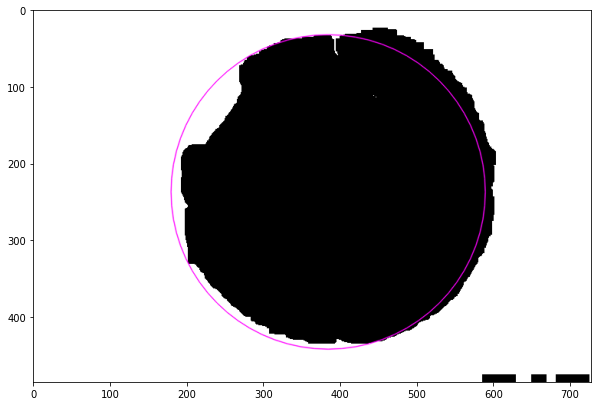

In [8]:
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
# params.minThreshold = 10;
# params.maxThreshold = 200;
# params.minThreshold = 10;
params.maxThreshold = 100;
 
# Filter by Area.
params.filterByArea = False
# params.minArea = 1500
 
# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = .5
 
# Filter by Convexity
# params.filterByConvexity = False
# params.minConvexity = 0.8
 
# Filter by Inertia
params.filterByInertia = False
# params.minInertiaRatio = 0.01

# inv_mask2 = 255-mask
# inv_mask = 255*np.ones((300,300), dtype=np.uint8)
# print(inv_mask.shape)


# inv_mask[0:183, 0:275] = inv_mask2
inv_mask = 255-mask

printParams(params)

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(inv_mask)
print('key points found: {}'.format(len(keypoints)))
for k in keypoints:
    print('> key point: {} {}'.format(k.pt, k.size))
#     print(k.size)
#     print(k.pt)
#     cv2.circle(blob_img, (int(k.pt[0]), int(k.pt[1])), int(k.size), (255,0,255))

blob_img = cv2.cvtColor(inv_mask,cv2.COLOR_GRAY2RGB)

im_with_keypoints = cv2.drawKeypoints(
    blob_img,
    keypoints,
    None,  # output image
    (255,0,255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(im_with_keypoints);


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.